In [2]:
from astropy.table import Table, vstack, setdiff, unique,  join
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy import stats
import pandas as pd
import glob

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [44]:
def median(x,y,group_size=500):
    array = np.transpose(np.vstack([x,y]))
    array=array[array[:,0].argsort()]
    index = 0

    x_list = np.array([])
    y_median_list = np.array([])
    while index < len(cat) - group_size:
        array_slice =array[index: index + group_size - 1]
        x_median = np.median(array_slice[:,0])
        y_median = np.median(array_slice[:,1])
        index = index + group_size
    
        x_list = np.append(x_list,x_median)
        y_median_list = np.append(y_median_list,y_median)

    array_slice = array[index: -1]
    x_median = np.median(array_slice[:,0])
    y_median = np.median(array_slice[:,1] )

    x_list = np.append(x_list,x_median)
    y_median_list = np.append(y_median_list,y_median)
    
    return x_list,y_median_list

### COSMOS2015 matched table

In [39]:
cat = Table.read('CUT_deep_catalogs/COSMOS2015_CLAUDS_matched.fits')
# '_1' --old parameters
# '_2' --new parameters
# '' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-0.007  0.019  0.003 -0.002 -0.024 -0.036 -0.052 -0.041 -0.066 -0.071
 -0.086 -0.084 -0.089 -0.088 -0.148    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan]


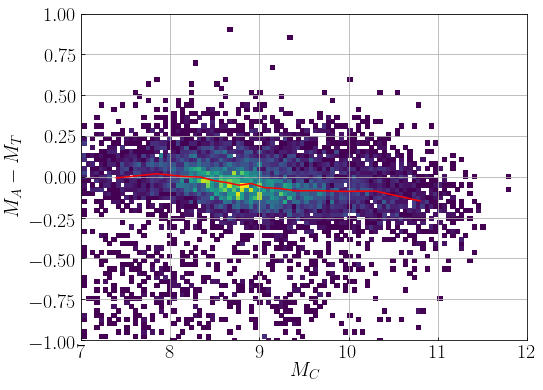

In [45]:
# cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['zKDEPeak_1']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS_2']<10,abs(cat['Z_BEST_BC03']-0.8)<0.1)]
# cat_cut = cat[np.logical_and(cat['preds_median_1']<0.89,abs(cat['zKDEPeak_1']-0.4)<0.1)]
# cat_cut = cat_cut[cat_cut['sfProb_1']<0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1,1])
plt.xlabel(r'$M_C$', fontsize=20)
plt.ylabel(r'$M_A-M_T$', fontsize=20)
plt.grid()
# plt.show(); plt.close()
print(y_median)


In [55]:
for gal in cat_cut:
    if gal['zKDEPeak_1']-gal['Z_BEST_BC03']>0.05*gal['Z_BEST_BC03']:
        print(gal['zKDEPeak_1'],gal['Z_BEST_BC03'],gal['ZPDF'])d

4.271355218238181 0.8175 3.8487
0.8923468879751257 0.7509 0.8306
1.1754377951493136 0.8454 0.1202
3.8806344492359086 0.8825 3.917
3.2686644776223654 0.8916 0.2777
3.0999228651220494 0.7898 0.4128
3.2157717249668516 0.7032 2.5882
3.2438653522917815 0.8058 2.1481
1.0345846662471245 0.8047 0.6795
3.99233120186879 0.8571 3.9398
1.1160187939623811 0.8019 0.1097
0.8878134852862571 0.7646 0.5122
3.998787862313044 0.8386 0.4192
1.4555586045141797 0.8496 0.6224
0.9225883581736187 0.7513 0.8292
3.834981885758248 0.8846 3.4591
0.9603955869202141 0.7868 1.0928
3.5978589107219996 0.823 3.0146
0.9005740914079878 0.8025 0.3091
0.8530955132734668 0.7394 0.7767
3.31219718121999 0.8157 3.0408
3.237253321705757 0.8754 3.6365
3.417098144779692 0.7094 3.4256
3.333355495521614 0.8072 3.1459
3.52298880920366 0.8032 3.3987
3.3689680483650877 0.8496 0.5241
3.963918694534579 0.8855 0.4036
3.174239628121361 0.8313 3.09
3.8497449963076695 0.72 3.2047
0.9385518194833495 0.832 1.0182
0.9400186180710435 0.8482 0.888

### matched table in ELAIS

In [206]:
cat = Table.read('CUT_deep_catalogs/s16a_DEEP_deep_masterCat_newz2.fits')

/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


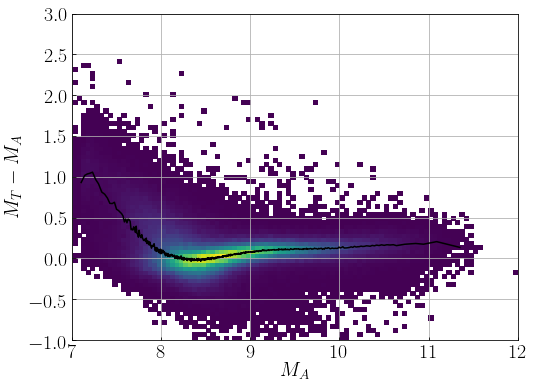

In [208]:
# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['zKDEPeak_old']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 
cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['sfProb']>0.5]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 6))
x = np.array(cat_cut['MASS_MED_old'])
y = np.array(cat_cut['MASS_MED']-cat_cut['MASS_MED_old'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'k')

plt.xlim([7,12])
plt.ylim([-1,3])
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T-M_A$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### COSMOS2015 matched catalog (with all of Thibaud's objects)

no parameters from Anneya's catalog are included

In [252]:
cat = Table.read('CUT_deep_catalogs/matched_thibaud_COSMOS.fits')
# '_1' --old parameters
# '_2' --COSMOS parameters

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


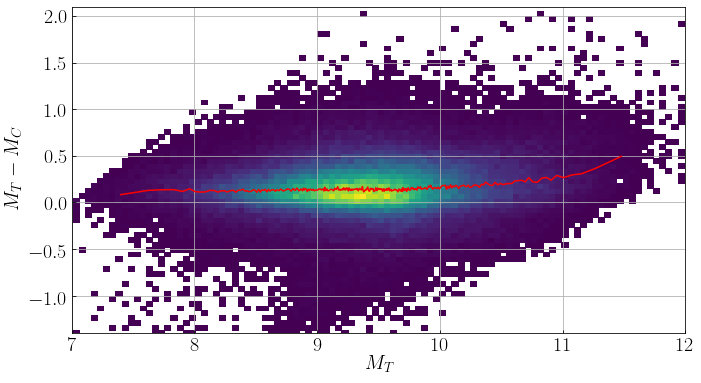

In [262]:
cat_cut = cat[np.logical_and(cat['CLASS_1']<10,abs(cat['ZPDF']-cat['Z_BEST_BC03'])<0.05*cat['Z_BEST_BC03'])] 

# cat_cut = cat[np.logical_and(cat['CLASS']<10,abs(cat['Z_BEST_BC03']-0.6)<0.3)] 
cat_cut = cat_cut[cat_cut['SSFR_BEST_1']>-11]

fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(11, 6))
x = np.array(cat_cut['MASS_MED_1'])
y = np.array(cat_cut['MASS_MED_1']-cat_cut['MASS_MED_2'])

y = y[np.logical_and(x>7,x<12)]
x = x[np.logical_and(x>7,x<12)]

x = x[np.logical_and(y>-3,y<3)]
y = y[np.logical_and(y>-3,y<3)]
x_list,y_median = median(x,y)

# # plot
plt.hist2d(x,y,bins=[100,100],cmin=0.1)
plt.plot(x_list,y_median,'r')

plt.xlim([7,12])
plt.ylim([-1.4,2.1])
plt.xlabel(r'$M_T$', fontsize=20)
plt.ylabel(r'$M_T-M_C$', fontsize=20)
plt.grid()
# plt.show(); plt.close()

### both-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that satisfy both old (M>11.15, zcut) and new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [601]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        print(cat_name,z)
        cat_old = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_params_old.positions.fits')
        cat_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.35_'+str(z)+'_params_new.positions.fits')
        cat3 = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
        cat_old_central = setdiff(cat_old,cat_new,keys='NUMBER')
        cat_new_central = setdiff(cat_new,cat_old,keys='NUMBER')

        for gal in cat_old:
            if gal['NUMBER'] in cat_new['NUMBER']:
                cat3.add_row(gal)

        cat3.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits',overwrite=True)
        cat_old_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_old_central.positions.fits',overwrite=True)
        cat_new_central.write('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_new_central.positions.fits',overwrite=True)
        print(len(cat3),len(cat_old_central),len(cat_new_central))
        

COSMOS_deep 0.4
67 8 6
COSMOS_deep 0.6
101 17 16
COSMOS_deep 0.8
121 29 37
ELAIS_deep 0.4
132 29 23
ELAIS_deep 0.6
122 22 29
ELAIS_deep 0.8
97 35 60
DEEP_deep 0.4
141 23 19
DEEP_deep 0.6
162 29 51
DEEP_deep 0.8
129 49 62
XMM-LSS_deep 0.4
99 18 13
XMM-LSS_deep 0.6
106 24 32
XMM-LSS_deep 0.8
115 40 38
SXDS_uddd 0.4
36 10 6
SXDS_uddd 0.6
53 9 7
SXDS_uddd 0.8
38 7 12


check properties of the centrals that satisfy both selection criteria

In [327]:
cat_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for cat_name in cat_names:
    for z in [0.4,0.6,0.8]:
        cat = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_'+str(z)+'_both_central.positions.fits')
        cat_combined = vstack([cat_combined,cat])
        

Text(0.5, 0, 'MassNew - MassOld  (log)')

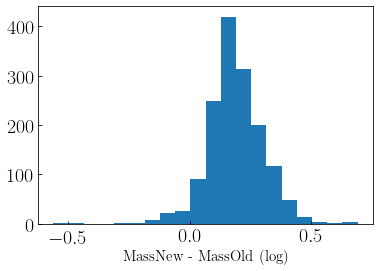

In [336]:
plt.hist(cat_combined['MASS_MED_new']-cat_combined['MASS_MED'],bins=20)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

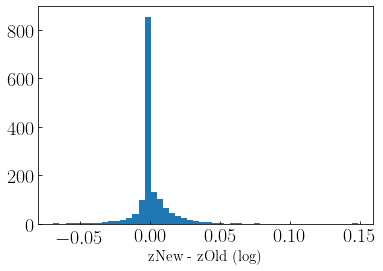

In [437]:
plt.hist(cat_combined['Z_BEST_BC03']-cat_combined['zKDEPeak'],bins=50)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### new/old-only-central catalogs (match the central catalogs, using two both-massive cats and isolation criteria)
save catalogs for massive centrals that only satisfy old (M>11.15, zcut) or new (M>11.35,zcut) selection criteria, and also pass the isolation criteria using corresponding selection criteria

In [351]:
cat_names = ['COSMOS_deep','ELAIS_deep', 'DEEP_deep','XMM-LSS_deep','SXDS_uddd']
selection = 'old'
cat_only_combined = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])
for z in [0.4,0.6,0.8]:
    for cat_name in cat_names:
        print(cat_name,z)
        cat_old_new = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+cat_name+'_11.15_'+str(z)+'_massive_'+selection+'_params_old.positions.fits')
        cat_only_combined = vstack([cat_only_combined,cat_old_new])
    combine_name = 'CUT_deep_catalogs/massive_gal_matched_cat/isolated_'+str(z)+'_massive_'+selection+'_central.positions.fits'
    cat_only_combined.write(combine_name,overwrite=True)
    print(combine_name)
            

COSMOS_deep 0.4
ELAIS_deep 0.4
DEEP_deep 0.4
XMM-LSS_deep 0.4
SXDS_uddd 0.4
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.4_massive_old_central.positions.fits
COSMOS_deep 0.6
ELAIS_deep 0.6
DEEP_deep 0.6
XMM-LSS_deep 0.6
SXDS_uddd 0.6
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.6_massive_old_central.positions.fits
COSMOS_deep 0.8
ELAIS_deep 0.8
DEEP_deep 0.8
XMM-LSS_deep 0.8
SXDS_uddd 0.8
CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_old_central.positions.fits


Text(0.5, 0, 'MassNew - MassOld  (log)')

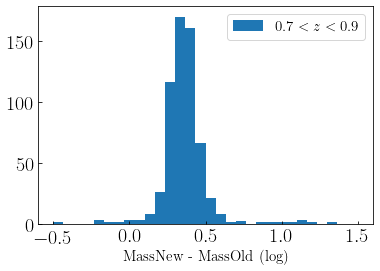

In [435]:
cat_only = Table.read('CUT_deep_catalogs/massive_gal_matched_cat/isolated_0.8_massive_new_central.positions.fits')
plt.hist(cat_only['MASS_MED_new']-cat_only['MASS_MED'],range=(-0.5,1.5),bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

Text(0.5, 0, 'zNew - zOld  (log)')

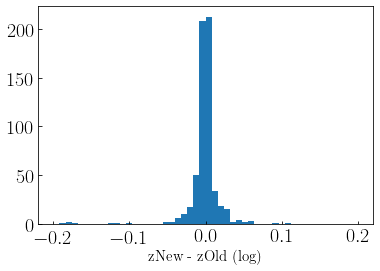

In [436]:
plt.hist(cat_only['Z_BEST_BC03']-cat_only['zKDEPeak'],bins=50,range=(-0.2,0.2))
plt.xlabel('zNew - zOld  (log)',fontsize=15)

### combine the satellite catalogs (old/new catalog directly)
combine satellite catalogs (one for each central) for each field and redshift bin

In [382]:
sat_path = 'CUT_deep_catalogs/total_sample_0321/COSMOS_deep_4.0/'
cat_stack = Table(names=cat_old.colnames, dtype=[str(y[0]) for x, y in cat_old.dtype.fields.items()])

filelist = glob.glob(sat_path+'/*.fits')

for filename in filelist:
    cat = Table.read(filename)
    cat_stack = vstack([cat_stack,cat])

print(len(cat_stack))

378
14780


Text(0.5, 0, 'zNew - zOld  (log)')

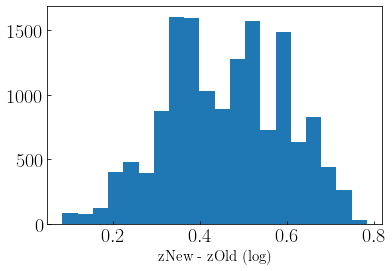

In [389]:
plt.hist(cat_stack['zKDEPeak'],bins=20)
plt.xlabel('zNew - zOld  (log)',fontsize=15)

Text(0.5, 0, 'MassNew - MassOld  (log)')

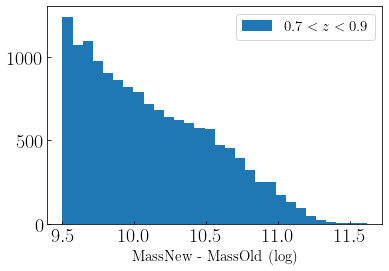

In [390]:
plt.hist(cat_stack['MASS_MED'],bins=30,label=r'$0.7<z<0.9$')
plt.legend(fontsize=15)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)

### combine the satellite catalogs (matched cat)
combine satellite catalogs (one for each central) for each field and redshift bin

To compare:
1. overlapping fraction
2. redshift difference
3. mass difference

In [168]:
# make sat/bkg catalog template to stack
path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/COSMOS_deep_4.0/COSMOS_deep_10054000006838_bkg.fits'
cat_sat = Table.read(path)
cat_temp = Table(names=cat_sat.colnames, dtype=[str(y[0]) for x, y in cat_sat.dtype.fields.items()])
cat_temp.write('CUT_deep_catalogs/table_template_matched_cat.fits',overwrite=True)

In [16]:
# stack satellite catalogs
# selected by old params
params = 'old'
cat_type = 'bkg'
cat_sat_stack = Table.read('CUT_deep_catalogs/table_template_'+params+'_cat.fits')
for z in [0.4, 0.6, 0.8]:
    path = 'CUT_deep_catalogs/total_sample_matched_cat_'+params+'_params_both-central_0506/'
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
        sat_path = path+cat_name+'_'+str(z*10)+'/'
        print('sat path:',sat_path)
        filelist = glob.glob(sat_path+'/*_'+cat_type+'.fits')
        for filename in filelist:
            cat = Table.read(filename)
            cat_sat_stack = vstack([cat_sat_stack, cat])

    cat_sat_stack = unique(cat_sat_stack,keys='NUMBER')
    cat_sat_stack.write(path+cat_type+'_cat'+str(z*10)+'.fits',overwrite=True)
    print(len(filelist),len(cat_sat_stack))

sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/COSMOS_deep_4.0/
sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/DEEP_deep_4.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/ELAIS_deep_4.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/XMM-LSS_deep_4.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/SXDS_uddd_4.0/


36 13933
sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/COSMOS_deep_6.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/DEEP_deep_6.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/ELAIS_deep_6.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/XMM-LSS_deep_6.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/SXDS_uddd_6.0/


53 32267
sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/COSMOS_deep_8.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/DEEP_deep_8.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/ELAIS_deep_8.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/XMM-LSS_deep_8.0/


sat path: CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/SXDS_uddd_8.0/


38 48754


overlapping fraction

In [65]:
z=0.8
cat_sat_stack_old_params  = Table.read('CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/sat_cat'+str(z*10)+'.fits')
cat_sat_stack_new_params  = Table.read('CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0506/sat_cat'+str(z*10)+'.fits')

cat_sat_stack_both = join(cat_sat_stack_old_params,cat_sat_stack_new_params,keys='NUMBER',join_type='inner')
cat_sat_stack_old_only = setdiff(cat_sat_stack_old_params,cat_sat_stack_new_params,keys='NUMBER')
cat_sat_stack_new_only = setdiff(cat_sat_stack_new_params,cat_sat_stack_old_params,keys='NUMBER')

65964


In [66]:
# radius cut

r_cut = 100 #kpc
cat_sat_both_cut = cat_sat_stack_both[cat_sat_stack_both['radius_1']<r_cut]
cat_sat_old_only_cut = cat_sat_stack_old_only[cat_sat_stack_old_only['radius']<r_cut]
cat_sat_new_only_cut = cat_sat_stack_new_only[cat_sat_stack_new_only['radius']<r_cut]

2511


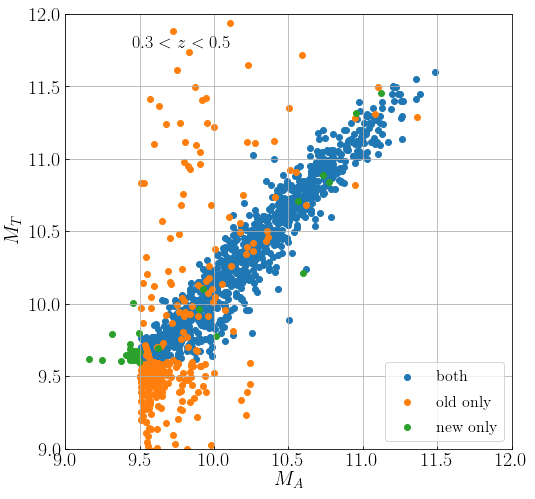

In [33]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 8))

# plot
plt.scatter(cat_sat_both_cut['MASS_MED_1'],cat_sat_both_cut['MASS_MED_new_1'],label='both')
plt.scatter(cat_sat_old_only_cut['MASS_MED'],cat_sat_old_only_cut['MASS_MED_new'],label='old only')
plt.scatter(cat_sat_new_only_cut['MASS_MED'],cat_sat_new_only_cut['MASS_MED_new'],label='new only')
print(len(cat_sat_stack_old_only))

plt.xlim([9.0,12])
plt.ylim([9.0,12])
plt.annotate('$'+str(round(z-0.1,1))+'<z<'+str(z+0.1)+'$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$M_A$', fontsize=20)
plt.ylabel(r'$M_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16)
# plt.show(); plt.close()

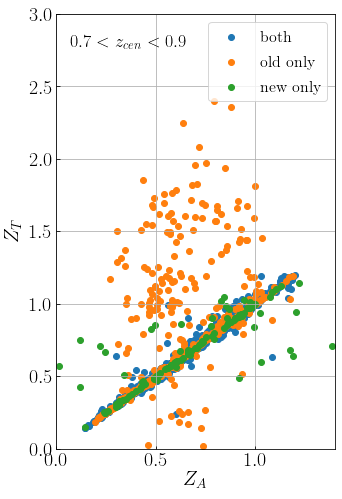

In [67]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(5,8))

# plot
plt.scatter(cat_sat_both_cut['zKDEPeak_1'],cat_sat_both_cut['Z_BEST_BC03_1'],label='both')
plt.scatter(cat_sat_old_only_cut['zKDEPeak'],cat_sat_old_only_cut['Z_BEST_BC03'],label='old only')
plt.scatter(cat_sat_new_only_cut['zKDEPeak'],cat_sat_new_only_cut['Z_BEST_BC03'],label='new only')

plt.xlim([0,1.4])
plt.ylim([0,3])
plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.05,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel(r'$Z_A$', fontsize=20)
plt.ylabel(r'$Z_T$', fontsize=20)
plt.grid()
plt.legend(fontsize=16)

ValueError: weights should have the same shape as x

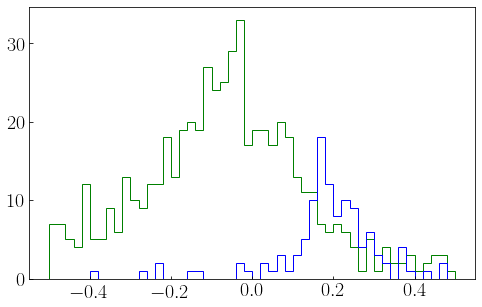

In [80]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_old_only_cut['MASS_MED_new']-cat_sat_old_only_cut['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='g',histtype='step',
        label='old only')

plt.hist(cat_sat_new_only_cut['MASS_MED_new']-cat_sat_new_only_cut['MASS_MED'],
         bins=50,range=(-0.5,0.5),color='b',histtype='step',label='new only')

plt.hist(cat_sat_both_cut['MASS_MED_new_1']-cat_sat_both_cut['MASS_MED_1'],
         bins=50,range=(-0.5,0.5),color='r',histtype='step',weights=np.ones(len(cat_sat_stack_both))*0.2,
        label='both * 0.2')

plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.68,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')


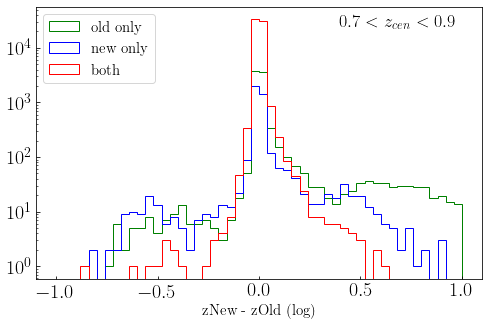

In [79]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_only['Z_BEST_BC03']-cat_sat_stack_old_only['zKDEPeak'],
         bins=50,range=(-1,1),color='g',histtype='step',
        label='old only')

plt.hist(cat_sat_stack_new_only['Z_BEST_BC03']-cat_sat_stack_new_only['zKDEPeak'],
         bins=50,range=(-1,1),color='b',histtype='step',label='new only')

plt.hist(cat_sat_stack_both['Z_BEST_BC03_1']-cat_sat_stack_both['zKDEPeak_1'],
         bins=50,range=(-1,1),color='r',histtype='step',
        label='both')

plt.annotate('$'+str(round(z-0.1,1))+'<z_{cen}<'+str(z+0.1)+'$',xy=([0.68,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel('zNew - zOld  (log)',fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15,loc='upper left')

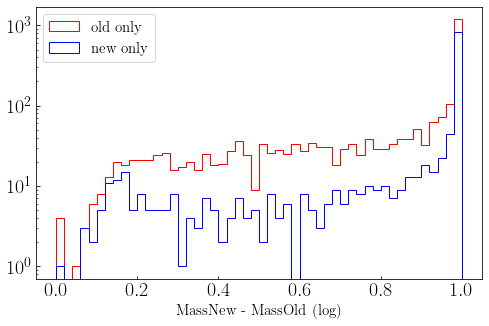

In [698]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_only['sfProb'],
         bins=50,range=(0,1),color='r',histtype='step',
        label='old only')
plt.hist(cat_sat_stack_new_only['sfProb'],
         bins=50,range=(0,1),color='b',histtype='step',
        label='new only')

plt.yscale('log')
plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

redshift difference

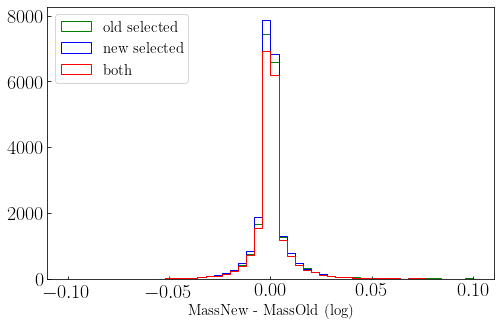

In [598]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))
plt.hist(cat_sat_stack_old_params['Z_BEST_BC03']-cat_sat_stack_old_params['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='g',histtype='step',
        label='old selected')

plt.hist(cat_sat_stack_new_params['Z_BEST_BC03']-cat_sat_stack_new_params['zKDEPeak'],
         bins=50,range=(-0.1,0.1),color='b',histtype='step',label='new selected')

plt.hist(cat_sat_stack_both['Z_BEST_BC03_1']-cat_sat_stack_both['zKDEPeak_1'],
         bins=50,range=(-0.1,0.1),color='r',histtype='step',
        label='both')

plt.xlabel('MassNew - MassOld  (log)',fontsize=15)
plt.legend(fontsize=15,loc='upper left')

look at individual satellite catalogs (per one central)

In [476]:
rand_n = 40
cat_name = 'DEEP_deep'

filelist_old = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params/'+cat_name+'_4.0/*_sat.fits')
filename_old = filelist_old[rand_n]
cat1 = Table.read(filename_old)

filelist_new = glob.glob('CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params/'+cat_name+'_4.0/*_sat.fits')
filename_new = filelist_new[rand_n]
cat2 = Table.read(filename_new)

print(len(cat1),len(cat2))

36 45


In [485]:
overlap_count = 0
cat_sat_stack_both_params = Table(names=cat1.colnames, dtype=[str(y[0]) for x, y in cat1.dtype.fields.items()])
for gal in cat2:
    if gal['NUMBER'] in cat1['NUMBER']:
        overlap_count += 1
        cat_sat_stack_both_params.add_row(gal)

print(overlap_count)

34


### sat/bkg catalogs
stacking them in each redshift bin

In [631]:
cat_type = 'bkg'
path = 'CUT_deep_catalogs/total_sample_0330/'
cat_temp = Table.read('CUT_deep_catalogs/table_template_old_cat.fits')
bkg_num = []
for z in [0.4, 0.6, 0.8]:
    bkg_num_z = 0
    cat_sat_stack = Table(names=cat_temp.colnames, dtype=[str(y[0]) for x, y in cat_temp.dtype.fields.items()])
    for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep','SXDS_uddd']:
        sat_path = path+cat_name+'_'+str(z*10)+'/'
        if cat_type == 'cen':
            filelist =  glob.glob(sat_path+'/isolated*.fits')
        else:
            filelist = glob.glob(sat_path+'/*_'+cat_type+'.fits')
            bkg_num_z += len(filelist)
        for filename in filelist:
            cat = Table.read(filename)
            cat_sat_stack = vstack([cat_sat_stack, cat])
    bkg_num.append(bkg_num_z)
    cat_sat_stack = unique(cat_sat_stack,keys='NUMBER')
    cat_sat_stack.write(path+'cat_'+cat_type+'_'+str(z)+'.fits',overwrite=True)
    print(z,len(cat_sat_stack))
np.save(path+'bkg_aperture_num_zbins.npy',np.array(bkg_num))

0.4 26764
0.6 38189
0.8 59781


Fig.2 in paper

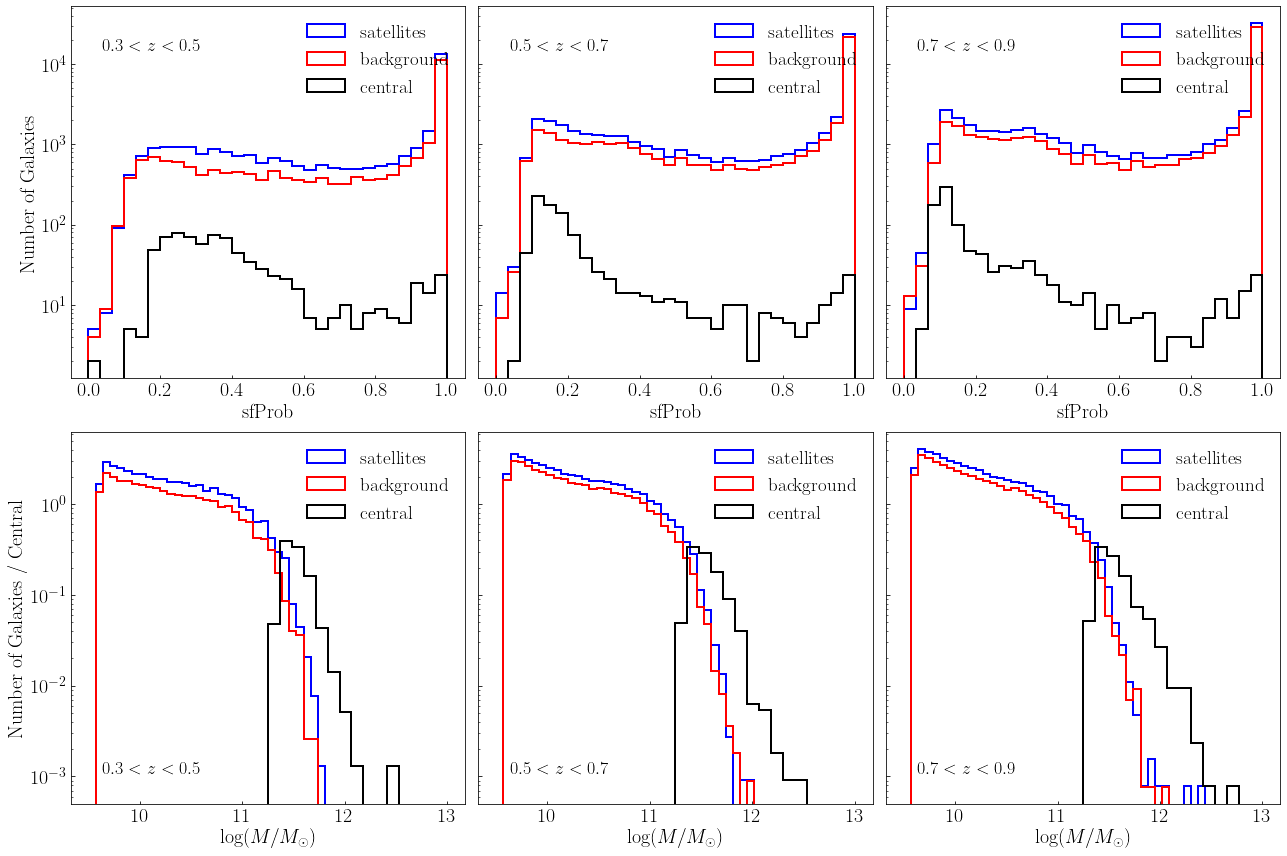

In [628]:
fig, axs = plt.subplots(2, 3, sharey='row', figsize = (18, 12),gridspec_kw={'height_ratios':[4,4]})
zs = [0.4,0.6,0.8]
path = 'CUT_deep_catalogs/versionB/total_sample_M1135_m96_0331/'
bkg_num_z_bins = np.load(path+'bkg_aperture_num_zbins.npy')
for i in range(3):
    z=zs[i]
    bkg_num_zbin = bkg_num_z_bins[i]
    cat_stack = Table.read(path+'cat_st_'+str(z)+'.fits')
    cat_stack_bkg = Table.read(path+'cat_bkg_'+str(z)+'.fits')
    cat_central = Table.read(path+'cat_cen_'+str(z)+'.fits')

    sfprob_list = cat_stack['sfProb']
    sfprob_list_bkg = cat_stack_bkg['sfProb']
    sfprob_list_cen = cat_central['sfProb']
    mass_list = np.array(cat_stack['MASS_MED'])
    mass_list_bkg = np.array(cat_stack_bkg['MASS_MED'])
    mass_list_cen = np.array(cat_central['MASS_MED'])
    
    # sfprob distribution plot
    axs[0][i].hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
    axs[0][i].hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='background')
    axs[0][i].hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')
    
    # mass distribution plot
    axs[1][i].hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,
         weights=np.ones(len(mass_list))/len(cat_central),label='satellites')
    axs[1][i].hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
         weights=np.ones(len(mass_list_bkg))/bkg_num_zbin,label='background')
    axs[1][i].hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=30,
         weights=np.ones(len(mass_list_cen))/len(cat_central),label='central')
    
    axs[0][0].set_yscale('log')
    axs[1][0].set_yscale('log')
    axs[0][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    axs[1][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[0][i].set_xlabel('sfProb',fontsize=20)
    axs[0][0].set_ylabel('Number of Galaxies',fontsize=20)
    axs[1][i].set_xlabel(r'$\log(M/M_\odot)$',fontsize=20)
    axs[1][0].set_ylabel('Number of Galaxies / Central',fontsize=20)
    axs[0][i].legend(fontsize=19,frameon=False)
    axs[1][i].legend(fontsize=19,loc='upper right',frameon=False)

fig.subplots_adjust(wspace=0)  
plt.tight_layout()
plt.savefig('figures/sfprob_mass_hist_combined.png',dpi=150)

sat - bkg per aperture

0.4 sat 22517.0 9222.0
0.4 bkg 17540.0 6289.0
0.4 sat - bkg 1.6968973747016707
0.6 sat 36950.0 16010.0
0.6 bkg 31923.0 12317.0
0.6 sat - bkg 1.3612239371784458
0.8 sat 46843.0 18481.0
0.8 bkg 40282.0 14254.0
0.8 sat - bkg 1.5521646557842441


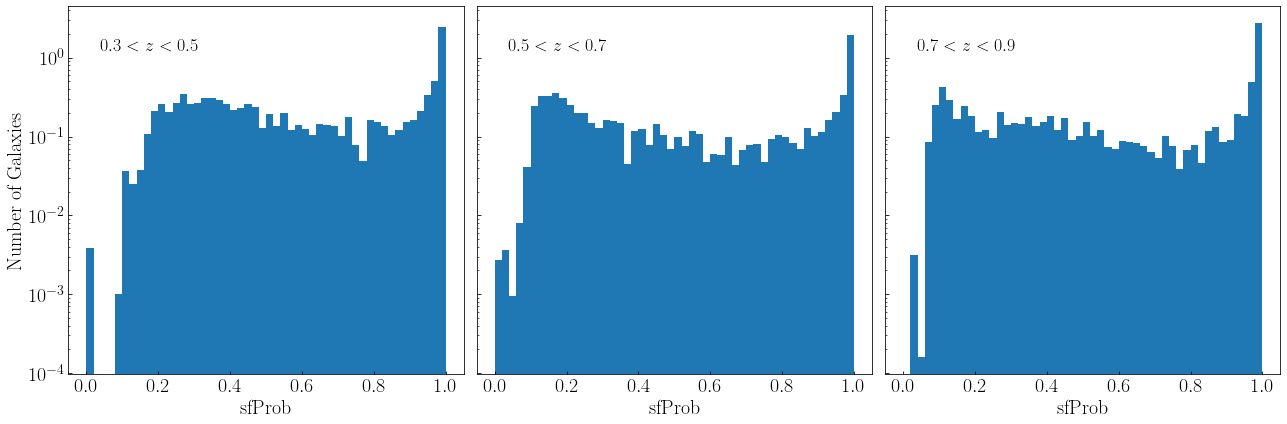

In [685]:
fig, axs = plt.subplots(1, 3, sharey='row', figsize = (18, 6))
zs = [0.4,0.6,0.8]
path = 'CUT_deep_catalogs/versionB/total_sample_M1135_m96_0331/'
bkg_num_z_bins = np.load(path+'bkg_aperture_num_zbins.npy')
for i in range(3):
    z=zs[i]
    bkg_num_zbin = bkg_num_z_bins[i]
    cat_stack = Table.read(path+'cat_sat_'+str(z)+'.fits')
    cat_stack_bkg = Table.read(path+'cat_bkg_'+str(z)+'.fits')
    cat_central = Table.read(path+'cat_cen_'+str(z)+'.fits')

    sfprob_list = cat_stack['sfProb']
    sfprob_list_bkg = cat_stack_bkg['sfProb']
    
    # sfprob distribution plot
    sat_hist, bin_edges = np.histogram(sfprob_list,range=(0,1.0), bins=50)
    bkg_hist, bin_edges = np.histogram(sfprob_list_bkg,range=(0,1.0), bins=50)
    axs[i].bar(bin_edges[:-1]+1/50./2,sat_hist/len(cat_central)-bkg_hist/bkg_num_zbin,1/50.)
    
    # fraction of sat/bkg with sfProb>0.94
    nsf_sat = round(sum(sat_hist*bin_edges[:-1]))
    nq_sat = round(sum(sat_hist*(1-bin_edges[:-1])))
    nsf_bkg = round(sum(bkg_hist*bin_edges[:-1]))
    nq_bkg = round(sum(bkg_hist*(1-bin_edges[:-1])))
    print(z,'sat',nsf_sat,nq_sat)
    print(z,'bkg',nsf_bkg,nq_bkg)
    print(z,'sat - bkg',(nsf_sat-nsf_bkg)/(nq_sat-nq_bkg))
    
    axs[0].set_yscale('log')
    axs[i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[i].set_xlabel('sfProb',fontsize=20)
    axs[0].set_ylabel('Number of Galaxies',fontsize=20)

fig.subplots_adjust(wspace=0)  
plt.tight_layout()
plt.savefig('figures/sfprob_mass_hist_combined.png',dpi=150)
                

### dynamical friction time-scale $t_{df}$

### $t_{df}=\frac{A}{\ln{\Lambda}} \frac{M_h}{M_s} \frac{R_{vir}}{v_c}$ 
Binney&Tremaine1987(2008)

In [114]:
def mh(log_Ms, params):
    M1, Ms0, beta, delta, gamma = params[0],params[1],params[2],params[3],params[4]
    Ms = 10**log_Ms
    log_mh = np.log10(M1)+beta*np.log10(Ms/Ms0)+(Ms/Ms0)**delta/(1+(Ms/Ms0)**(-1*gamma))-0.5
    return log_mh

# Leauthaud et al. 2012 (0.22<z<0.48)
def set_params(a,b,c,d,e):
    M1 = 10**(12.52 + a*0.037)
    Ms0 = 10**(10.916 + b*0.02)
    beta = 0.457 + c*0.009
    delta = 0.566 + d*0.086
    gamma = 1.53 + e*0.18
    return M1, Ms0, beta, delta, gamma

# Coupon et al. 2015 (0.5<z<1)
def set_params_coupon(a,b,c,d,e):
    M1 = 10**(12.84 + a*0.023)
    Ms0 = 10**(10.98 + b*0.017)
    beta = 0.48 + c*0.019
    delta = 0.63 + d*0.084
    gamma = 1.6 + e*0.18
    return M1, Ms0, beta, delta, gamma


In [31]:
#(M_s subhalo mass, M_h halo mass, R_vir virial radius, rho_bar critical density)

def t_df(m_h, m_s):
    rho_bar = 9.9e-27 #kg/m**3
    r_vir = (3*m_h/(800*rho_bar*np.pi))**(1/3)
    G = 6.67e-11
    t_df = 1.17/np.log(1+m_h/m_s)*(m_h**0.5/m_s)*r_vir**1.5/G**0.5
    return t_df/3.1e7/10**9  # in Gyr


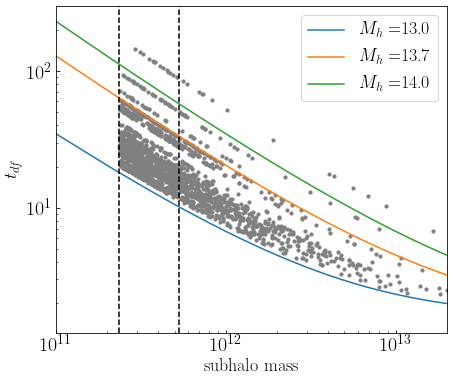

In [135]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(7, 6))
m_s = np.linspace(10**11,10**13.3,200)*2e30

cat_cen = Table.read('CUT_deep_catalogs/total_sample_0503/COSMOS_deep_4.0/isolated_COSMOS_deep_11.15_0.4_massive_normal_params_old.positions.fits')
for cen_info in cat_cen[:50]:
    cen_id = cen_info['NUMBER']
    cat_sat = Table.read('CUT_deep_catalogs/total_sample_0503/COSMOS_deep_4.0/COSMOS_deep_'+str(cen_id)+'_sat.fits')

    m_hs = mh(cen_info['MASS_MED'],set_params(0,0,0,0,0))
    m_ss = mh(cat_sat['MASS_MED'],set_params(0,0,0,0,0))
    t_dfs = t_df(10**m_hs*2e30, 10**m_ss*2e30)
    plt.scatter(10**m_ss,t_dfs,color='gray',s=10)

for log_m_h in [13.0,13.7,14.0]:
    m_h = 10**log_m_h*2e30
    t_dfs = t_df(m_h, m_s)
    plt.plot(m_s/2e30,t_dfs,label='$M_h=$'+str(log_m_h))

for m_s_cut in [9.5,10.2]:
    m_h_cut = mh(m_s_cut,set_params(0,0,0,0,0))
    plt.axvline(x=10**m_h_cut,ymin=0,ymax=1,color='k',linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlim([10**11,10**13.3])
plt.xlabel('subhalo mass',fontsize=18)
plt.ylabel('$t_{df}$',fontsize=18)
plt.legend(fontsize=18)

In [ ]:
m_s = np.linspace(10**11.5,10**12.5,200)*2e30
for log_m_h in [13.0,13.7,14.0]:
    m_h = 10**log_m_h*2e30
    t_dfs = t_df(m_h, m_s)
    plt.plot(m_s/2e30,t_dfs,label='$M_h=$'+str(log_m_h))
    
plt.xscale('log')
plt.xlabel('subhalo mass',fontsize=18)
plt.ylabel('$t_{df}$',fontsize=18)
plt.legend(fontsize=18)

### mass distribution of satellite <100kpc
low/high mass fraction change significantly from old to new cat?

In [ ]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 5))

# old params
path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_old_params_0405/'
cat_sat_stack_4 = Table.read(path+'sat_cat4.0.fits')
cat_sat_stack_6 = Table.read(path+'sat_cat6.0.fits')
cat_sat_stack_8 = Table.read(path+'sat_cat8.0.fits')
plt.hist(cat_sat_stack_4['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='k')
plt.hist(cat_sat_stack_6['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='b')
plt.hist(cat_sat_stack_8['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='r')

# new params
path = 'CUT_deep_catalogs/total_sample_matched_cat_massive_both-central_new_params_0405/'
cat_sat_stack_4 = Table.read(path+'sat_cat4.0.fits')
cat_sat_stack_6 = Table.read(path+'sat_cat6.0.fits')
cat_sat_stack_8 = Table.read(path+'sat_cat8.0.fits')
plt.hist(cat_sat_stack_4['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='k',linestyle='--')
plt.hist(cat_sat_stack_6['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='b',linestyle='--')
plt.hist(cat_sat_stack_8['MASS_MED'],bins=50,range=(9.4,12),histtype='step',color='r',linestyle='--')


plt.xlabel('MassNew / MassOld  (log)',fontsize=15)
plt.yscale('log')
# plt.legend(fontsize=15,loc='upper left')

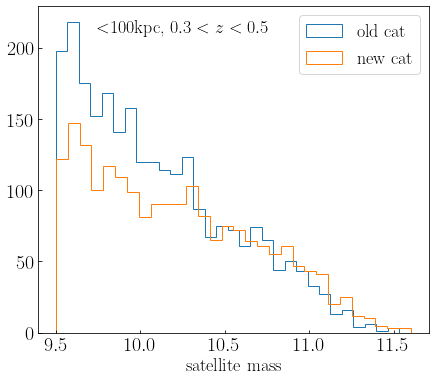

In [234]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(7, 6))

path = 'CUT_deep_catalogs/total_sample_0503/'
cat_sat_old = Table.read(path+'cat_sat_0.4.fits')

path = 'CUT_deep_catalogs/total_sample_new_cat_0503/'
cat_sat_new = Table.read(path+'cat_sat_0.4.fits')

cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
plt.hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
plt.hist(cat_sat_new['MASS_MED']-0.1,histtype='step',bins=30,label='new cat')
plt.annotate('$<$100kpc, $0.3<z<0.5$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
plt.xlabel('satellite mass',fontsize=18)
plt.legend(fontsize=18)
# plt.yscale('log')

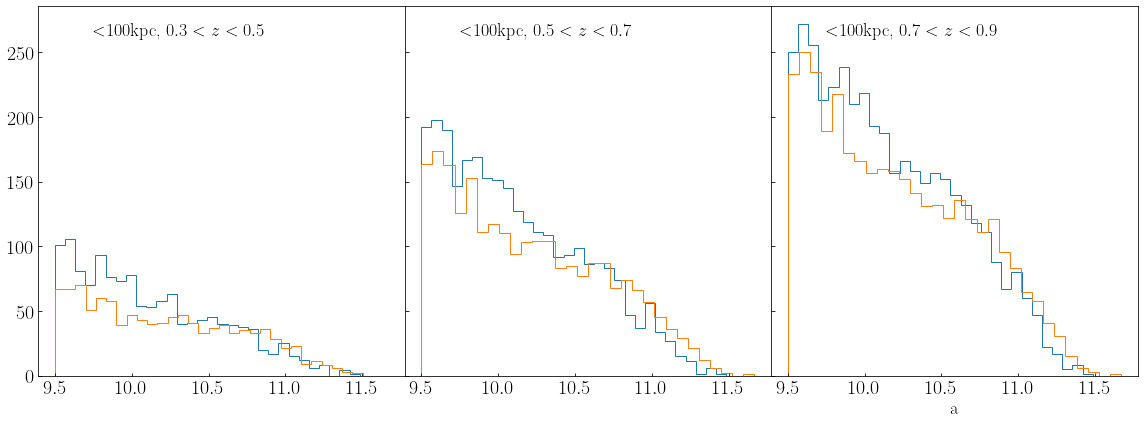

In [22]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.xlabel('a', fontsize=18)

for i,z in enumerate([0.4, 0.6, 0.8]):
    path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/'
    cat_sat_old = Table.read(path+'sat_cat'+str(z*10)+'.fits')

    path = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0506/'
    cat_sat_new = Table.read(path+'sat_cat'+str(z*10)+'.fits')

    cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
    cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
    axs[i].hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
    axs[i].hist(cat_sat_new['MASS_MED_new']-0.1,histtype='step',bins=30,label='new cat')
    axs[i].annotate('$<$100kpc, $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
    
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

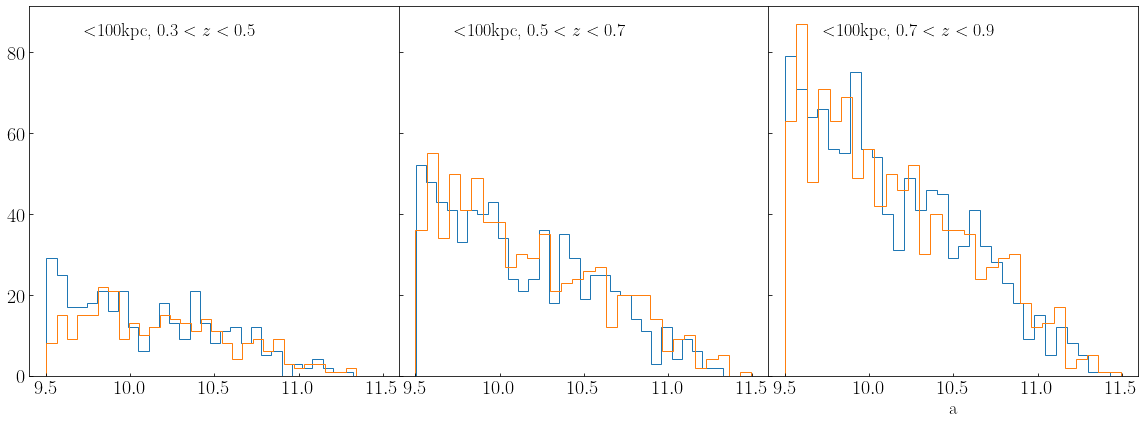

In [23]:
# bkg fraction?

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.xlabel('a', fontsize=18)

for i,z in enumerate([0.4, 0.6, 0.8]):
    path = 'CUT_deep_catalogs/total_sample_matched_cat_old_params_both-central_0506/'
    cat_sat_old = Table.read(path+'bkg_cat'+str(z*10)+'.fits')

    path = 'CUT_deep_catalogs/total_sample_matched_cat_new_params_both-central_0506/'
    cat_sat_new = Table.read(path+'bkg_cat'+str(z*10)+'.fits')

    cat_sat_old = cat_sat_old[cat_sat_old['radius']<100]
    cat_sat_new = cat_sat_new[cat_sat_new['radius']<100]
    axs[i].hist(cat_sat_old['MASS_MED'],histtype='step',bins=30,label='old cat')
    axs[i].hist(cat_sat_new['MASS_MED_new']-0.1,histtype='step',bins=30,label='new cat')
    axs[i].annotate('$<$100kpc, $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.15,0.92]),xycoords='axes fraction',fontsize=18)
    
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)